In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# This is for multi-plotting

# KDE plot for bivariate distribution
import seaborn as sns
#https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/
from scipy.stats import multivariate_normal

from sklearn.model_selection import train_test_split
# coef attribute in models
from sklearn.linear_model import LinearRegression, Lasso, Ridge# Modules for calculation Precision, Recall, F1 Score

# Model Error for Linear Regression Classifiers
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
import os
df = pd.read_csv(os.path.join(os.getcwd(),"USA_Housing.csv"))

In [26]:
df.head() # Check first 5 instances

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [27]:
df.info() # Get info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [35]:
df = df.drop("Address", axis=1)

In [28]:
# Check for null columns
a=list(df.columns)
b=[]
for i in a:
    c=df[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Avg. Area Income,0
1,Avg. Area House Age,0
2,Avg. Area Number of Rooms,0
3,Avg. Area Number of Bedrooms,0
4,Area Population,0
5,Price,0
6,Address,0



## Dataset

The data is the USA Housing Pricising Dataset from [Kaggle]( https://www.kaggle.com/vedavyasv/usa-housing) 

- `Avg. Area Income`: Average Income of residents of the city house is located in.

- `Avg. Area House Age`: Average Age of Houses in same city

- `Avg. Area Number of Rooms`: Average Number of Rooms for Houses in same city

- `Avg. Area Number of Bedrooms`: Average Number of Bedrooms for Houses in same city

- `Area Population`: Population of city which the house is located in

- `Price`: Price that the house sold at

- `Address`: Address for the house




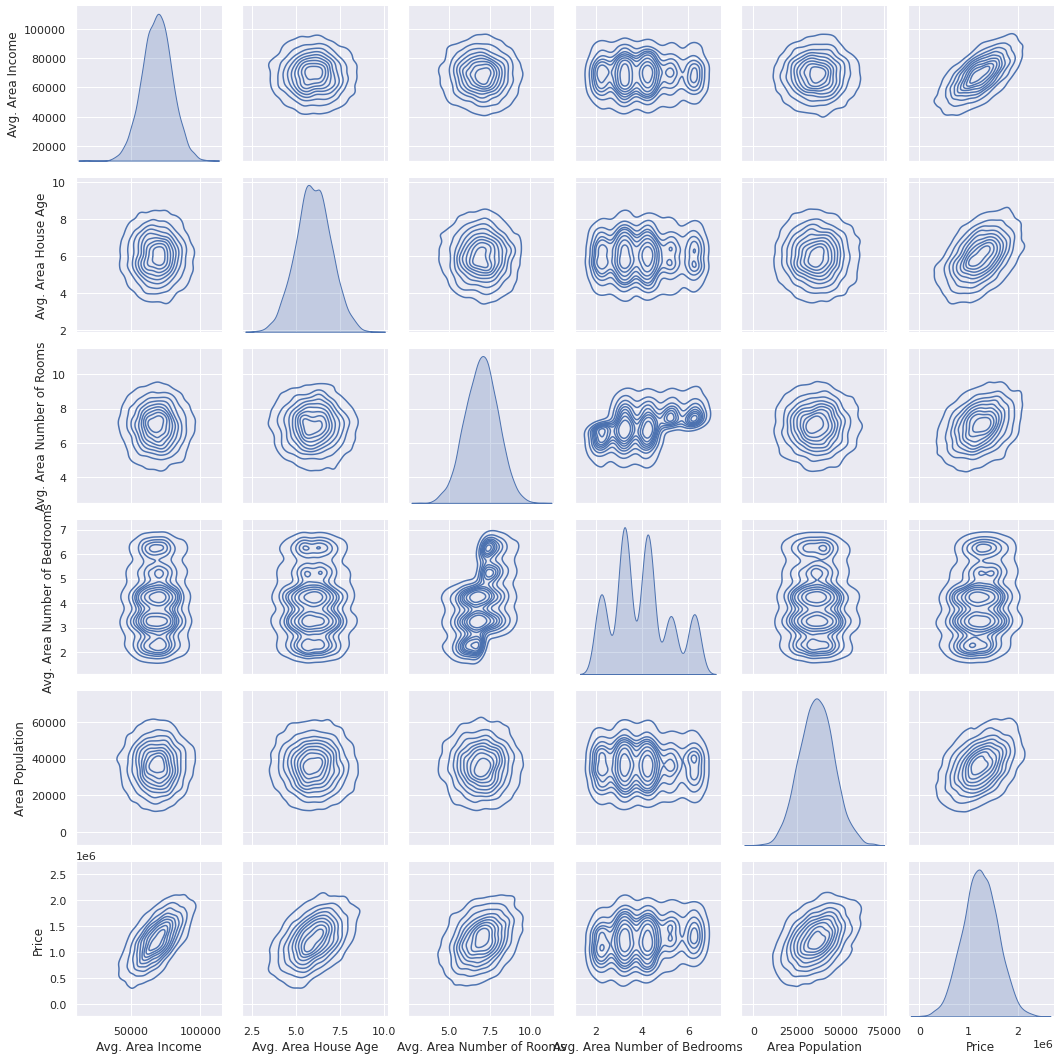

In [29]:
sns.pairplot(df, kind="kde") # Check distribution

In [30]:
# Custom Functions
def variance(x):
    mean = np.mean(x)
    total_sum = 0
    for i in x:
        total_sum += (i-mean)**2
    return (total_sum/(len(x)-1))
def covariance(x,y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    total_sum = 0
    for i in x:
        for j in y:
            total_sum += ((i-mean_x)*(j-mean_y))
    return total_sum/(len(x)-1)
def covariance_matrix(x,y):
    return np.array([
        [variance(x), covariance(x,y)],
        [covariance(y,x), variance(y)],
    ])

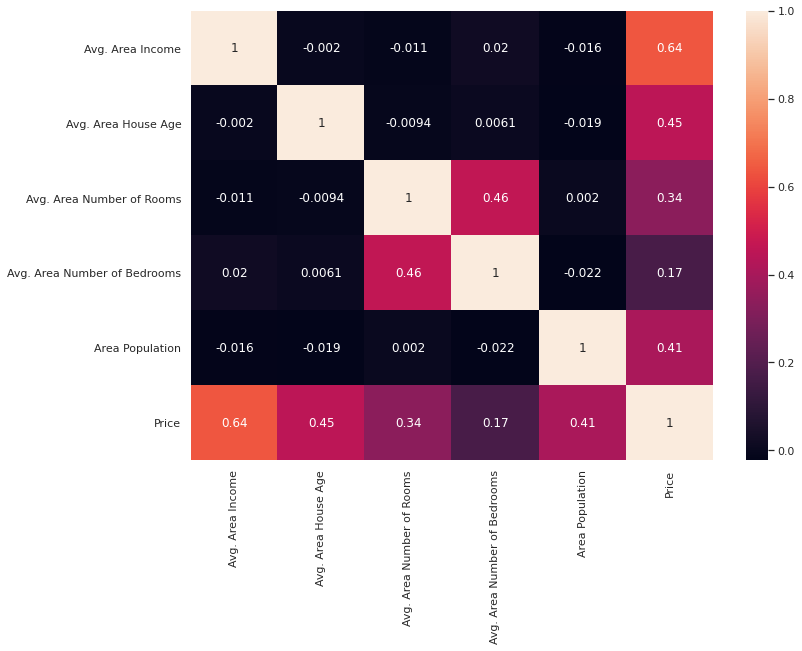

In [31]:
# Correlation Matrix
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
covMatrix = np.cov(df,bias=True)
sns.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [11]:
# Features and Prediction
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [19]:
def plot_3d(x,y,x_name,y_name): 
    z = multivariate_normal.pdf(np.dstack([x,y]), mean=np.mean([x,y],axis=1),cov=np.cov([x,y]))

    # Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(x,y,z, cmap=plt.cm.viridis, linewidth=0.2)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    plt.show()

Mean Vector: 
[  36163.51603857 1232072.65414236]
Covariance Matrix: 
[[9.84988265e+07 1.43167010e+09]
 [1.43167010e+09 1.24667120e+11]]


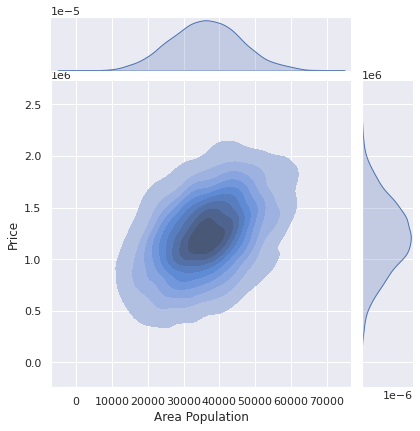

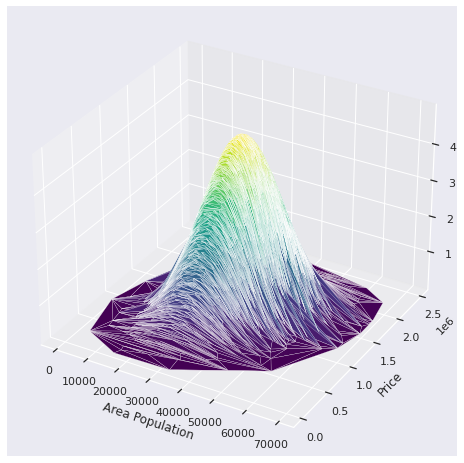

In [23]:
x = df["Area Population"]

print("Mean Vector: ")
print(np.mean([x,y],axis=1))
print("Covariance Matrix: ")
print(np.cov([x,y], bias=1))

sns.jointplot(data=df,x="Area Population", y='Price', kind="kde", fill=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

plot_3d(x,y,"Area Population",'Price')

In [ ]:
x = df['Avg. Area Number of Rooms']

print("Mean Vector: ")
print(np.mean([x,df["Price"]],axis=1))
print("Covariance Matrix: ")
print(np.cov([x,df["Price"]], bias=1))

sns.jointplot(data=df,x='Avg. Area Number of Rooms', y='Price', kind="kde", fill=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

plot_3d(x,y,'Avg. Area Number of Rooms','Price')

Mean Vector: 
[3.61635160e+04 5.97722204e+00]
Covariance Matrix: 
[[ 9.84988265e+07 -1.84407766e+02]
 [-1.84407766e+02  9.82788759e-01]]


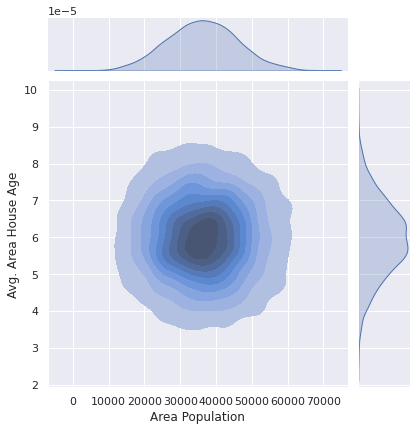

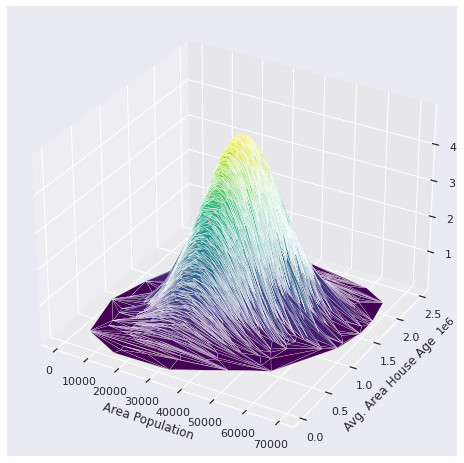

In [22]:
x = df["Area Population"]

print("Mean Vector: ")
print(np.mean([x,df["Avg. Area House Age"]],axis=1))
print("Covariance Matrix: ")
print(np.cov([x,df["Avg. Area House Age"]], bias=1))

sns.jointplot(data=df,x="Area Population", y='Avg. Area House Age', kind="kde", fill=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

plot_3d(x,y,"Area Population",'Avg. Area House Age')

## Models

In [16]:
# Split the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
least_squares = LinearRegression()
least_squares.fit(X_train, y_train)

LinearRegression()

### Lasso Regression

A linear model that estimates sparse coefficients.

Mathematically, it consists of a linear model trained with  ℓ1  prior as regularizer. The objective function to minimize is:

$min_w\frac{1}{2 * nsamples}∣∣Xw−y∣∣^2_2+ α∣∣w∣∣_{1}$
 
The lasso estimate thus solves the minimization of the least-squares penalty with  $α∣∣w∣∣_1 $ added, where  α  is a constant and  $∣∣w∣∣_1$  is the  ℓ1−norm  of the parameter vector.

In [24]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

### Ridge Regression

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$min_w∣∣Xw−y∣∣^2_2+α∣∣w∣∣_2^2$

 
$α>=0$  is a complexity parameter that controls the amount of shrinkage: the larger the value of  α , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

Ridge regression is an **L2 penalized model**. Add the squared sum of the weights to the least-squares cost function.


In [25]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train) # Explain alpha and different algorithms

Ridge()

## Metrics

- `Mean Absolute Error (MAE)` is the mean of the absolute value of the errors:

    * $\frac{1}{n}\sum_{i=1}^n|Y_i−\hat{Y}i|$
 

- `Mean Squared Error (MSE)` is the mean of the squared errors:

    * $\frac{1}{n}\sum_{i=1}^n(Y_i−\hat{Y}i)^2$
 

- `Root Mean Squared Error (RMSE)` is the square root of the mean of the squared errors:

    * $\sqrt{\frac{1}{n}\sum_{i=1}^n(Y_i−\hat{Y}i)^2}$
 
 
 Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.

- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [ ]:
Table = {
    
    # Model Names
    "models": ["Least Squares", "Lasso", "Ridge"],
    
    # Parameters
    
    "coef_1": [least_squares.coef_[0],lasso.coef_[0], ridge.coef_[0]],
    "coef_2": [least_squares.coef_[1],lasso.coef_[1], ridge.coef_[1]],
    "coef_3": [least_squares.coef_[2],lasso.coef_[2], ridge.coef_[3]],
    "coef_4": [least_squares.coef_[3],lasso.coef_[3], ridge.coef_[3]],
    "coef_5": [least_squares.coef_[4],lasso.coef_[4], ridge.coef_[4]],
    "intercept": [least_squares.intercept_, lasso.intercept_, ridge.intercept_],
    
    # Error Metrics
    
    "Mean Absolute Error": [mean_absolute_error(y_test, least_squares.predict(X_test)),
           mean_absolute_error(y_test, lasso.predict(X_test)), 
           mean_absolute_error(y_test, ridge.predict(X_test))],
    
    "Mean Squared Error": [mean_squared_error(y_test, least_squares.predict(X_test)),
           mean_squared_error(y_test, lasso.predict(X_test)), 
           mean_squared_error(y_test, ridge.predict(X_test))],
    
    "Root Mean Squared Error": [mean_squared_error(y_test, least_squares.predict(X_test))**0.5,
             mean_squared_error(y_test, lasso.predict(X_test))**0.5, 
             mean_squared_error(y_test, ridge.predict(X_test))**0.5],
    
    "R2": [least_squares.score(X_test,y_test),
           lasso.score(X_test,y_test), 
           ridge.score(X_test,y_test)]
}

In [ ]:
stats = pd.DataFrame(Table)

In [ ]:
stats.head()